<a href="https://colab.research.google.com/github/rnjsdmstj/ITB2022/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_%EC%B5%9C%EC%A2%85_2010529_%EA%B6%8C%EC%9D%80%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치 & 임포트

In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=25bb8e49313d7086f77f7a25a8dfd69e05445e008dd63407ec1159e933988d88
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.3 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [3]:
import mglearn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [6]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


# (1) 분류 문제 선정

* 종속변수: 남성의 음주 여부

* 독립변수: 식전혈당(공복혈당) 변수부터 감마지티피 변수 (13~23번 변수)까지

해당 변수 간의 관계를 통해서 어떤 독립변수의 수치가 남성의 음주 여부를
판단하는데 가장 관련성이 높은지 확인하고자 한다.

결과에 무관하게 세운 가정: 음주를 할수록 간의 상태가 좋지 않을 것이다. 따라서, 감마지티피, 혈청지오티(ALT) 변수의 중요도가 높을 것이고, 음주여부가 'No'인 남성일수록 변수의 수치가 더욱 낮게 나올 것이다.

# 데이터 전처리
* 탐색
* 필요한 데이터 추출
* 널값 제거

In [7]:
# csv 데이터 가져오기, 가입자일련번호를 인덱스로 지정
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bigmining/health_data.csv", index_col='가입자일련번호')

print(health.columns)
display(health.info())      # 10000행의 데이터 - 가입자일련번호는 index이므로 생략됨, 30개 변수 (결측치 있음, 정리 필요) 
display(health.head())      # 처음 5행 확인

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [8]:
health = health[health['성별코드'].str.contains('M')] #남성 선택

health.reset_index(drop=True, inplace=True)

In [9]:
display(health.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5138 entries, 0 to 5137
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         5138 non-null   int64  
 1   시도코드         5138 non-null   int64  
 2   성별코드         5138 non-null   object 
 3   연령대코드(5세단위)  5138 non-null   int64  
 4   신장(5Cm단위)    5138 non-null   int64  
 5   체중(5Kg 단위)   5138 non-null   int64  
 6   허리둘레         5138 non-null   float64
 7   시력(좌)        5138 non-null   float64
 8   시력(우)        5138 non-null   float64
 9   청력(좌)        5138 non-null   int64  
 10  청력(우)        5138 non-null   int64  
 11  수축기혈압        5104 non-null   float64
 12  이완기혈압        5104 non-null   float64
 13  식전혈당(공복혈당)   5104 non-null   float64
 14  총콜레스테롤       2026 non-null   float64
 15  트리글리세라이드     2026 non-null   float64
 16  HDL콜레스테롤     2026 non-null   float64
 17  LDL콜레스테롤     1970 non-null   float64
 18  혈색소          5104 non-null   float64
 19  요단백   

None

In [10]:
print(health.isnull().sum())

기준년도              0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            34
이완기혈압            34
식전혈당(공복혈당)       34
총콜레스테롤         3112
트리글리세라이드       3112
HDL콜레스테롤       3112
LDL콜레스테롤       3168
혈색소              34
요단백              58
혈청크레아티닌          34
(혈청지오티)AST       34
(혈청지오티)ALT       34
감마지티피            34
흡연상태              1
음주여부              0
구강검진수검여부          0
치아우식증유무        3267
치석             3267
데이터공개일자           0
dtype: int64


In [11]:
# 결측치 행 전체 삭제
health = health.dropna(axis=0)   #열삭제의 경우 axis =1 
print("결측행 모두 제거: ", health.shape)    # 결측치 모두 없어졌는지 확인

print(health.isnull().sum())

결측행 모두 제거:  (677, 30)
기준년도           0
시도코드           0
성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
치아우식증유무        0
치석             0
데이터공개일자        0
dtype: int64


Yes    515
No     162
Name: 음주여부, dtype: int64


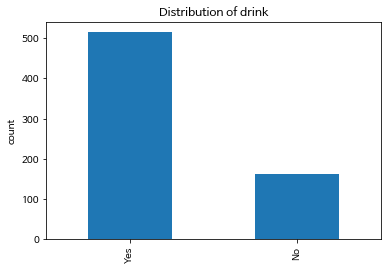

In [12]:
print(health['음주여부'].value_counts())

health['음주여부'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of drink')
plt.show()

M    677
Name: 성별코드, dtype: int64


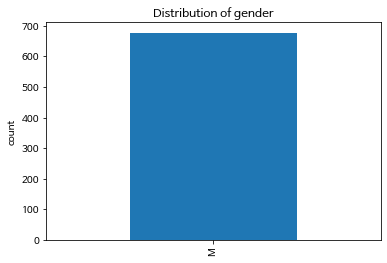

In [13]:
print(health['성별코드'].value_counts())

health['성별코드'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of gender')
plt.show()

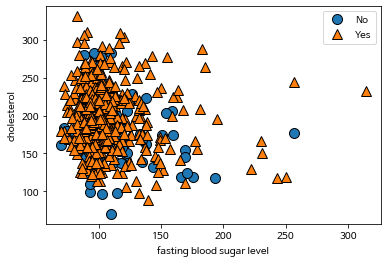

In [14]:
mglearn.discrete_scatter(health['식전혈당(공복혈당)'], health['총콜레스테롤'], health['음주여부'])
plt.xlabel("fasting blood sugar level")
plt.ylabel("cholesterol") 
plt.legend()
plt.show()

# 분류모델 만들기

## 의사결정나무 모델

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.iloc[:, [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]  # 11개 변수 
y = health.iloc[:, 25]   # target 변수 음주여부,,,?성별코드,,? 일단 성별코드로 설정

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(class_weight = "balanced", random_state=0)  
tree.fit(X_train, y_train)  #(학습용 데이터 작성)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.624


In [43]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
#가중치 부여 포함, 해당 모델 선택
tree = DecisionTreeClassifier(class_weight = "balanced", max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.748
시험용 데이터 정확도: 0.659


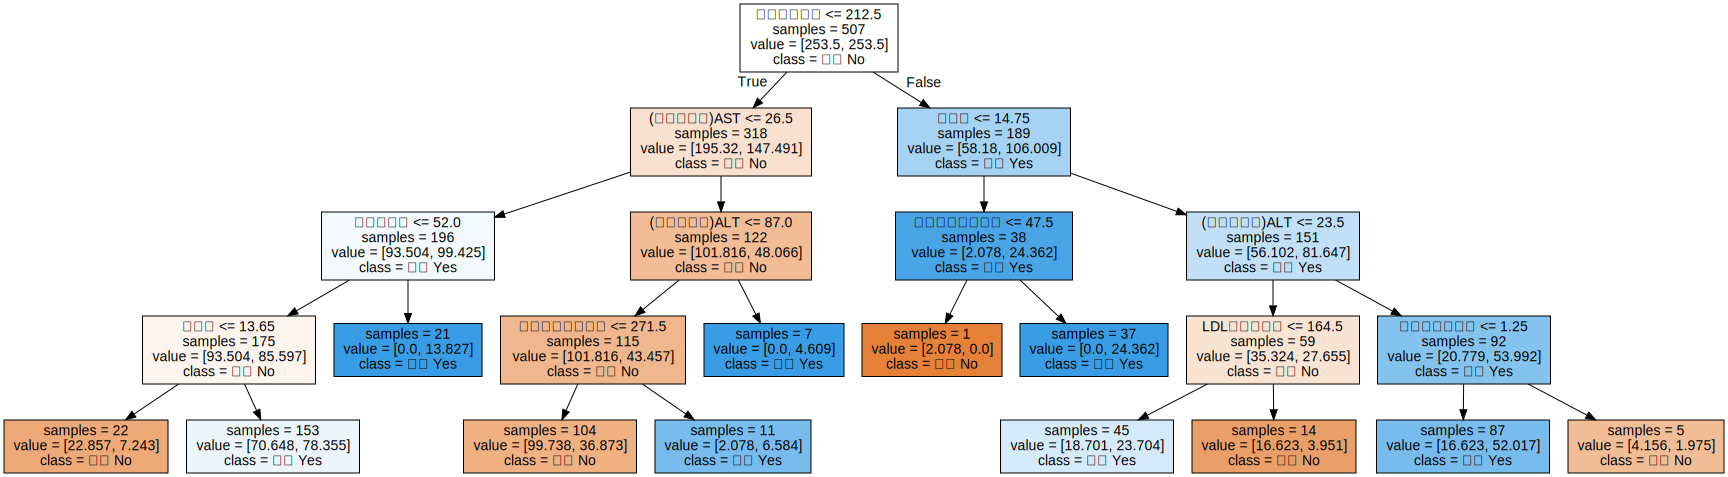

In [44]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "음주 No", "음주 Yes"],
                feature_names=health.columns[[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#(어떤 순서로 중요한지 확인 가능)

In [45]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.18386408 0.13820185 0.         0.06658202 0.15825111
 0.         0.03812464 0.11406941 0.176033   0.12487388]


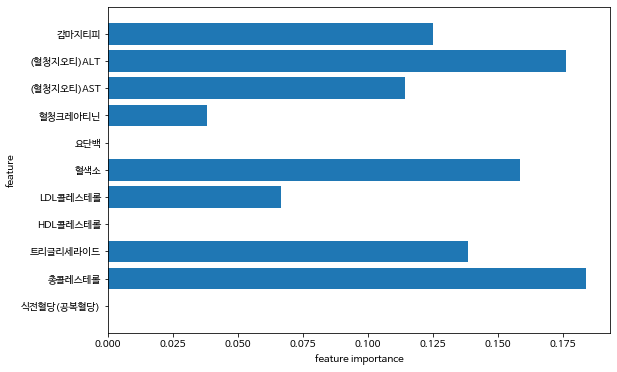

In [46]:
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])  # 11개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])   # 11개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(tree)

#(0이라고 해서 중요하지 않은 것 아님)

## 앙상블 모델:랜덤포레스트

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


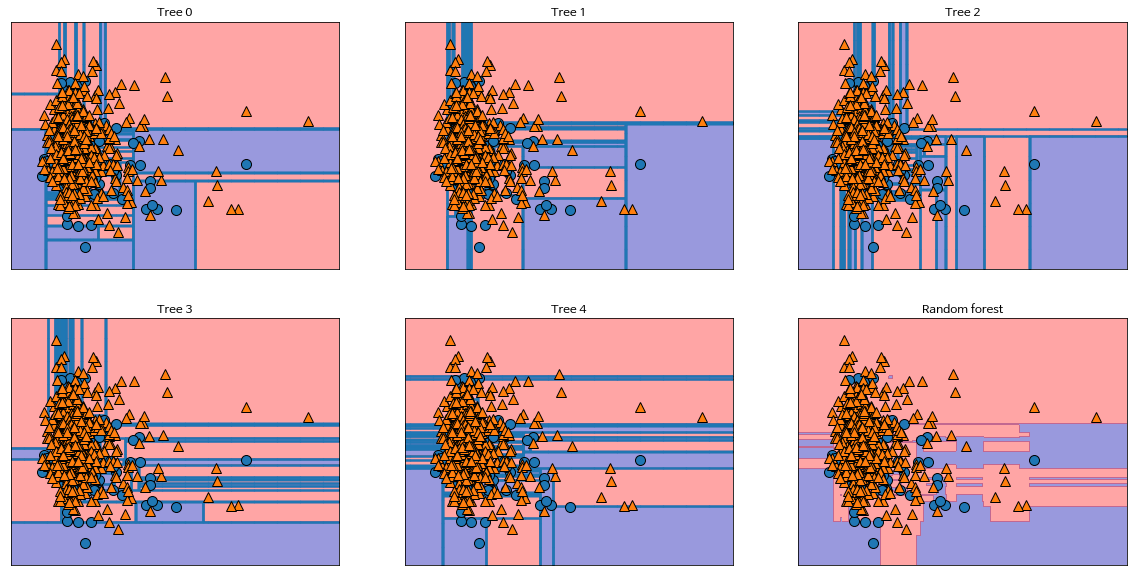

In [20]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [21]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.765


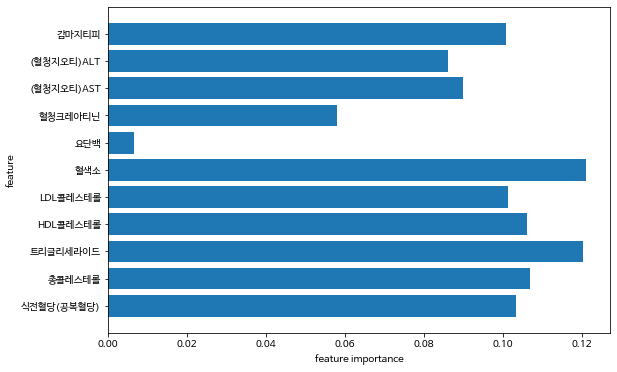

In [22]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_wisc(forest)   

In [47]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.43137255 0.66666667 0.52941176 0.45098039 0.52941176 0.58823529
 0.54901961 0.72       0.62       0.54      ]
Random forest:  [0.78431373 0.76470588 0.76470588 0.74509804 0.76470588 0.76470588
 0.76470588 0.74       0.78       0.76      ]
Accuracy mean
Decision tree :0.563
Random forest :0.763


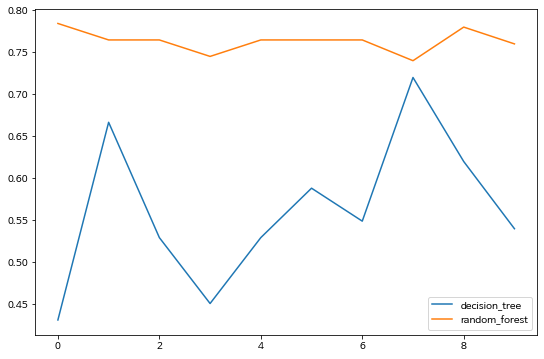

In [48]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

## 앙상블 모델: 그래디언트 부스팅

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [26]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.911
시험용 데이터 세트 정확도: 0.759


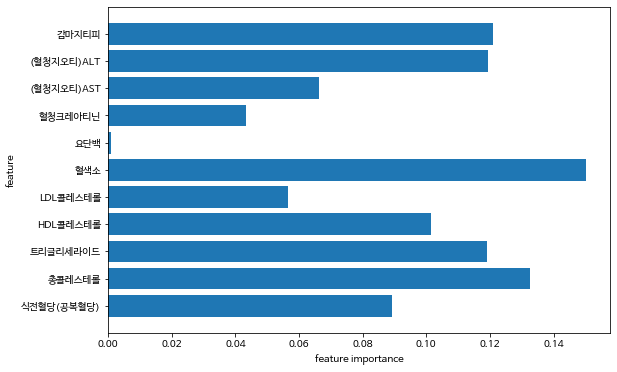

In [27]:
plot_feature_importances_wisc(gbrt)

In [28]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.834
시험용 데이터 세트 정확도: 0.765


In [29]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.763
시험용 데이터 세트 정확도: 0.771


In [30]:
# 그리드서치 결과 반영

gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1, learning_rate=0.02)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.759
시험용 데이터 세트 정확도: 0.765


# 분류모델평가

#(2) 분류 모델 선택 및 평가 결과

* 선택한 평가: Accuracy(정확도) 
* 최적의 분류모델: 랜덤 포레스트

교차검증을 시도한 결과, 랜덤 포레스트 모델에서 0.763의 가장 높은 정확도를
보였으므로 선택하게 되었다.
정오 분류표에서의 결과에서도 정확도가 0.765로 그래디언트 부스팅과 함께 높은 결과를 도출했기에 최적의 분류모델이 맞다고 생각한다.

## 교차검증

In [49]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.43137255 0.66666667 0.52941176 0.45098039 0.52941176 0.58823529
 0.54901961 0.72       0.62       0.54      ]
Random forest:  [0.78431373 0.76470588 0.76470588 0.74509804 0.76470588 0.76470588
 0.76470588 0.74       0.78       0.76      ]
Gradient boosting:  [0.76470588 0.76470588 0.74509804 0.76470588 0.76470588 0.74509804
 0.74509804 0.76       0.76       0.76      ]
Accuracy mean
Decision tree :0.563
Random forest :0.763
Gradient boosting :0.757


In [50]:
# 교차 검증 상세 옵션 지정

# KFold :기본값 n_splits=5, shuffle=None (데이터를 임의로 섞지 않음) 
# LeaveOneOut :데이터 1개를 검증에 이용 
# ShuffleSplit :임의 분할, 전체 데이터를 모두 사용하지 않을 수도 있음
# GroupKFold :그룹을 지정해서 같은 그룹의 데이터는 학습용 또는 검증용으로 동일하게 분할
# StratifiedKFold :각 fold마다 클래스의 분포가 동일하도록 분할 (예. 악성:양성) 
# RepeatedStratifiedKFold: 교차검증을 반복, 기본값 n_repeats =10

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.563
Random forest :0.763
Gradient boosting :0.757


## 그리드 서치

In [33]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [34]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.741617,8,0.751479,0.739645,0.733728
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.717949,15,0.727811,0.710059,0.715976
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.723866,12,0.721893,0.733728,0.715976
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.743590,5,0.757396,0.739645,0.733728
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.727811,10,0.751479,0.721893,0.710059
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.727811,10,0.715976,0.733728,0.733728
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.743590,5,0.751479,0.745562,0.733728
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.723866,12,0.733728,0.721893,0.715976
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.719921,14,0.710059,0.727811,0.721893
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.743590,5,0.745562,0.751479,0.733728


In [35]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.02, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.7535


In [36]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.765


## 모델평가지표: 정오분류표

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환 
encoder = LabelEncoder()
labels = encoder.fit_transform(y_test)
# 2차원 데이터로 변환 
labels = labels.reshape(-1,1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
print(y_test)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

4976    Yes
2704    Yes
594     Yes
2894    Yes
898      No
       ... 
5081     No
2651    Yes
4555    Yes
3061    Yes
909     Yes
Name: 음주여부, Length: 170, dtype: object
원-핫 인코딩 데이터
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

Yes    130
No      40
Name: 음주여부, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.659
[[17 23]
 [35 95]]
Random forest 시험용 데이터 세트 정확도:0.765
[[  4  36]
 [  4 126]]
Gradient boosting 시험용 데이터 세트 정확도:0.765
[[  0  40]
 [  0 130]]


In [52]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["B", "M"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["B", "M"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["B", "M"]))

Decision Tree:
              precision    recall  f1-score   support

           B       0.33      0.42      0.37        40
           M       0.81      0.73      0.77       130

    accuracy                           0.66       170
   macro avg       0.57      0.58      0.57       170
weighted avg       0.69      0.66      0.67       170

Random Forest:
              precision    recall  f1-score   support

           B       0.50      0.10      0.17        40
           M       0.78      0.97      0.86       130

    accuracy                           0.76       170
   macro avg       0.64      0.53      0.51       170
weighted avg       0.71      0.76      0.70       170

Gradient Boosting:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        40
           M       0.76      1.00      0.87       130

    accuracy                           0.76       170
   macro avg       0.38      0.50      0.43       170
weighted avg       0.58  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# (3) 인사이트 도출

감마지티피와 (혈청지오티)ALT변수도 작지 않은 수치를 보인 것은 맞지만, 
혈색소와 트리글리세라이드 변수등이 더욱 높은 중요도를 차지한 점에서 예상과는 달랐다.

* 혈색소의 경우, 수치가 과다해지면 혈색소 침착증이 발생할 가능성이 있고, 이에 따라 간경화가 발생할 수 있기에 관련성이 높은 수치라는 점을 새롭게 판단할 수 있었다. 음주를 하게 되면 간의 상태가 악화되기 때문이다.
* 트리글리세라이드의 경우 과다한 알코올 섭취를 하게되면 실제로 지방의 농도가 증가할 수 있는 점에서 이 또한 음주 여부를 판단할 수 있는
변수였음을 알 수 있었다.